In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('penguins.csv')
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [5]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'].astype(str)).astype(float)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                344 non-null    float64
dtypes: float64(5)
memory usage: 13.6 KB


In [7]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [8]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
3,NaN,NaN,NaN,NaN,3.0
4,36.7,19.3,193.0,3450.0,1.0
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,3.0
340,46.8,14.3,215.0,4850.0,1.0
341,50.4,15.7,222.0,5750.0,2.0
342,45.2,14.8,212.0,5200.0,1.0


In [9]:
data.dropna(inplace=True)
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,2.0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1.0
340,46.8,14.3,215.0,4850.0,1.0
341,50.4,15.7,222.0,5750.0,2.0
342,45.2,14.8,212.0,5200.0,1.0


In [10]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
cols = data.columns
ms = MinMaxScaler()
X = ms.fit_transform(data)
X = pd.DataFrame(X, columns=[cols])

In [13]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.254545,0.666667,0.060990,0.291667,0.666667
1,0.269091,0.511905,0.061964,0.305556,0.333333
2,0.298182,0.583333,0.063718,0.152778,0.333333
3,0.167273,0.738095,0.063328,0.208333,0.333333
4,0.261818,0.892857,0.062744,0.263889,0.666667
...,...,...,...,...,...
337,0.549091,0.071429,0.067420,0.618056,0.333333
338,0.534545,0.142857,0.067615,0.597222,0.333333
339,0.665455,0.309524,0.068979,0.847222,0.666667
340,0.476364,0.202381,0.067030,0.694444,0.333333


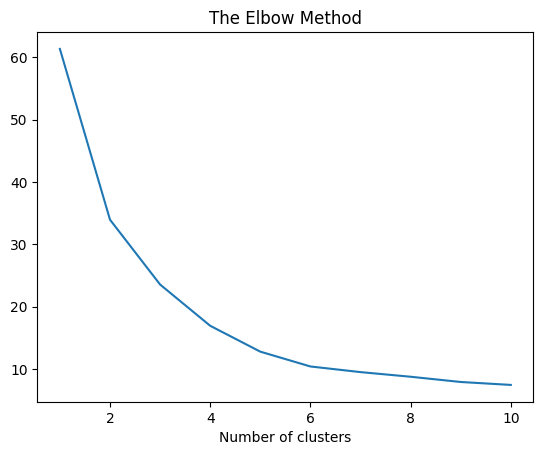

In [14]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


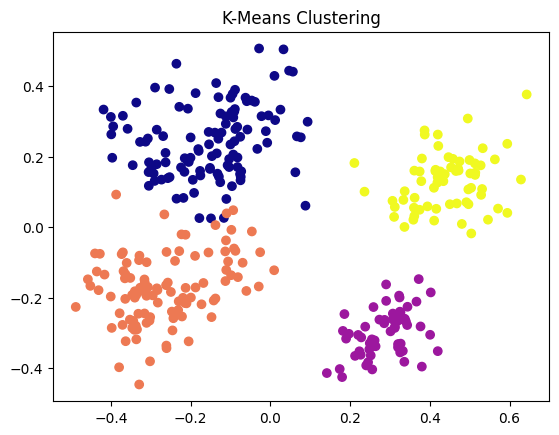

In [18]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma')
plt.title('K-Means Clustering')
plt.show()